# <center>Classification using Tree Methods and Model Tuning

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Loading the data set
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Fetch dataset
heart_disease = fetch_ucirepo(id=45)

# Data (as pandas dataframes)
X = heart_disease.data.features
y = heart_disease.data.targets

# Converting the target variable to binary
# 0 indicates no disease, 1 indicates any level of disease
y_binary = np.where(y == 0, 0, 1)
y_binary_series = pd.Series(y_binary.reshape(-1), name='HeartDisease')

# Now, X contains the features and y_binary contains the binary target
print(X.head())
print(y_binary_series.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
0    0
1    1
2    1
3    0
4    0
Name: HeartDisease, dtype: int64


In [3]:
# Handling missing values (ex- by removing rows with missing data)
if X.isnull().values.any():
    X.dropna(inplace=True)

    # Ensure that the rows in 'y' correspond to the rows in the cleaned 'X'

# Since 'y' (targets) do not have missing values, they can be used as is
y_binary_series = y_binary_series.loc[X.index]
y = y.loc[X.index]


print(X.head())
# However, ensure that the rows in 'y' correspond to the rows in the cleaned 'X'
print(len(y_binary_series) == len(X))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  
True


/var/folders/p_/d57tpnkj54l60xy2z6dzdd400000gn/T/ipykernel_15082/1684083601.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(inplace=True)


### Data preprocessing 
(Standardizing the features, one-hot encoding, label encoding)

In [4]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


In [5]:
#Standardize the features

hd_df = pd.concat([X, y_binary_series], axis=1)
X = hd_df.drop('HeartDisease', axis=1)
y = hd_df['HeartDisease']

# Normalizing Training Dataset
categorical_data_hd = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
numerical_data_hd = X.columns.drop(categorical_data_hd)

# Extracting numerical data for scaling
numerical_values_hd = X[numerical_data_hd]

#Performing scaling
scaler = StandardScaler()
scaled_data_hd = scaler.fit_transform(numerical_values_hd)
numerical_scaled_hd_df = pd.DataFrame(scaled_data_hd, columns=numerical_data_hd)

numerical_scaled_hd_df.head()

,age,trestbps,chol,thalach,oldpeak,ca
0,0.936181,0.750380,-0.276443,0.017494,1.068965,-0.721976
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2.478425
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1.411625
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,-0.721976
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,-0.721976


In [6]:
# Perform one hot encoding
encoder = OneHotEncoder(sparse=False)
categorical_encoded_hd = encoder.fit_transform(X[categorical_data_hd])

categorical_encoded_hd_df = pd.DataFrame(categorical_encoded_hd, columns=encoder.get_feature_names_out(categorical_data_hd))


print(categorical_encoded_hd_df.shape)

(297, 19)


/Users/mishika/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# Combining encoded categorical data and scaled numerical data

numerical_scaled_hd_df.reset_index(drop=True, inplace=True)
categorical_encoded_hd_df.reset_index(drop=True, inplace=True)

combined_df_hd = pd.concat([numerical_scaled_hd_df, categorical_encoded_hd_df], axis=1)

combined_df_hd.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,0.936181,0.750380,-0.276443,0.017494,1.068965,-0.721976,0.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.378929,1.596266,0.744555,-1.816334,0.381773,2.478425,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,1.378929,-0.659431,-0.353500,-0.899420,1.326662,1.411625,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
3,-1.941680,-0.095506,0.051047,1.633010,2.099753,-0.721976,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-1.498933,-0.095506,-0.835103,0.978071,0.295874,-0.721976,1.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### Modeling

In [8]:
#Splitting the data into training and validation set
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(combined_df_hd, y, test_size = 0.3, random_state=20)

### Decision Tree


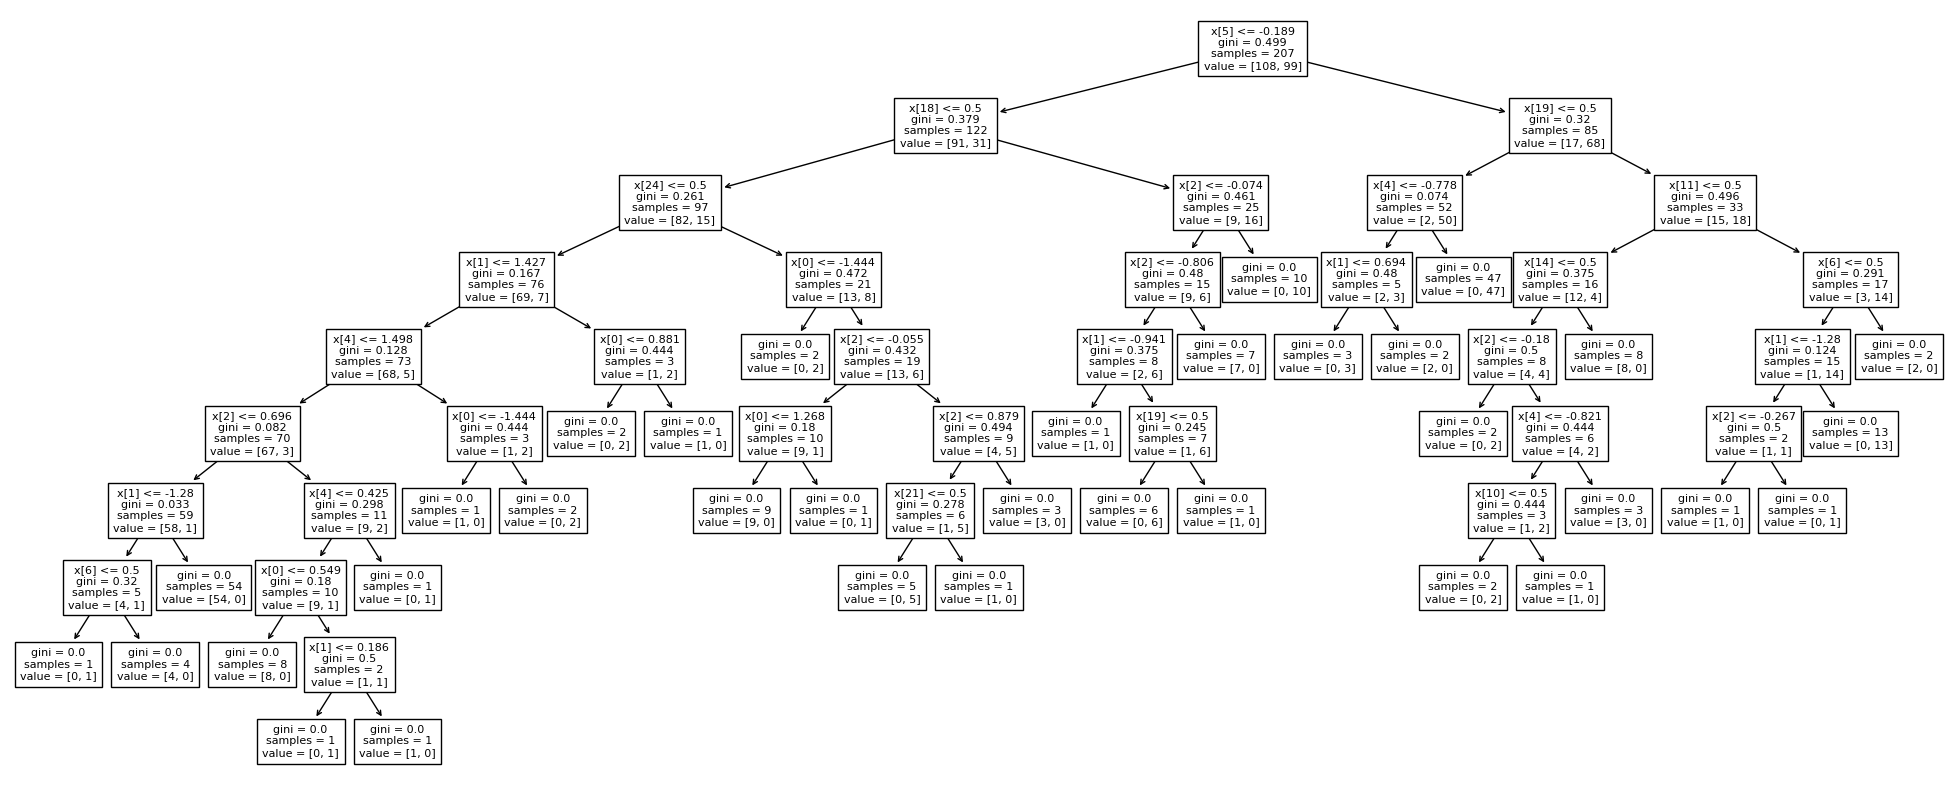

In [16]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state=30)
classifier.fit(X_train, y_train)
from sklearn import tree

fig, ax = plt.subplots(figsize=(25, 10)) 
tree.plot_tree(classifier, ax=ax, fontsize=8)
plt.show()

In [17]:
# Making predictions on the training data

y_train_prediction = classifier.predict(X_train)

In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve

In [19]:
print("Training Data Accuracy:", accuracy_score(y_train, y_train_prediction))
print("Training Data Precision:", precision_score(y_train, y_train_prediction))
print("Training Data Recall:", recall_score(y_train, y_train_prediction))

Training Data Accuracy: 1.0
Training Data Precision: 1.0
Training Data Recall: 1.0


In [20]:
#Making predictions on the validation data

y_val_prediction = classifier.predict(X_val)

In [21]:

print("Vlaidation Data Accuracy:", accuracy_score(y_val, y_val_prediction))
print("Validation Data Precision:", precision_score(y_val, y_val_prediction))
print("Validation Data Recall:", recall_score(y_val, y_val_prediction))

Vlaidation Data Accuracy: 0.7222222222222222
Validation Data Precision: 0.6511627906976745
Validation Data Recall: 0.7368421052631579


Plot ROC curve and obtain AUC for predictions on the validation data.

In [22]:
# Plotting the ROC curve by giving appropriate names for title and axes.


from sklearn.metrics import roc_curve
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

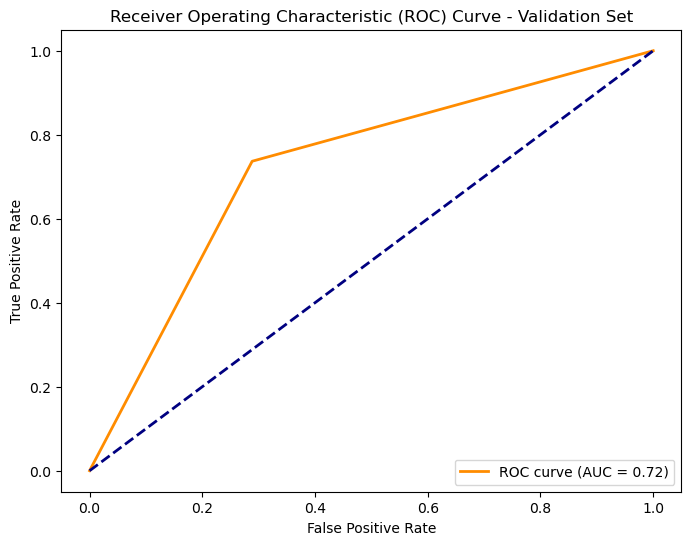

AUC for Validation Set: 0.7241902834008098


In [23]:
# Predict probabilities for each class on the validation set
y_val_proba = classifier.predict_proba(X_val)[:, 1]

# Calculate ROC curve and AUC for the binary classification
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve for the binary classification
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Validation Set')
plt.legend(loc="lower right")
plt.show()

# Print AUC for the binary classification
print("AUC for Validation Set:", roc_auc)

The model shows possible signs of overfitting. While it performs perfectly on the training set with low(or nearly no) bias, the significant drop in accuracy on the validation set and variability in precision and recall across classes suggest high variance. The model is likely too complex and has learned noise in the training data, resulting in poor generalization to new, unseen data. To fix the issue of overfitting, we can reduce the model's complexity, such as through hyperparameter tuning or using a simpler model. If we look into numbers more specifically, in the training set, the prediction of accuracy, precision, and recall was 1 individually, indicating the model fits the training set very well with no bias. While in the validation set, precision (0.651) and recall (0.737) indicate that the model performs reasonably well, but there is room for improvement. Also, a significant drop in performance on the validation set compared to the training set often indicates higher variance.

### Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability.


In [24]:
from sklearn.ensemble import RandomForestClassifier

ranfor = RandomForestClassifier(random_state=30).fit(X_train, y_train)

In [25]:
# Making predictions on the training data
y_train_pred=ranfor.predict(X_train)

In [26]:

precision = precision_score(y_train, y_train_pred)

# Calculate Recall
recall = recall_score(y_train, y_train_pred)

# Calculate Accuracy
accuracy = accuracy_score(y_train, y_train_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Precision: 1.0
Recall: 1.0
Accuracy: 1.0


Print accuracy, precision and recall for the predictions made on the training data.

In [27]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [28]:
# Making predictions on the validation data
y_pred=ranfor.predict(X_val)


Print accuracy, prediction and recall for the predictions made on the validation data.

In [29]:

# Calculate Precision
precision = precision_score(y_val, y_pred)

# Calculate Recall
recall = recall_score(y_val, y_pred)

# Calculate Accuracy
accuracy = accuracy_score(y_val, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)


Precision: 0.75
Recall: 0.868421052631579
Accuracy: 0.8222222222222222


Plot ROC curve and obtain AUC for the validation predictions

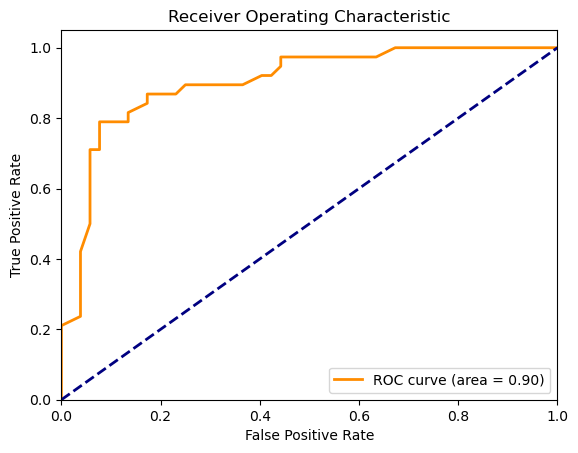

In [30]:
# Plotting the ROC curve by giving appropriate names for title and axes.


from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics

import matplotlib.pyplot as plt


y_probs = ranfor.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
y_probs = ranfor.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()



For the Random Forest model, we see an accuracy of 82.2%, indicating a relevantly low level of bias. And the AUC area of random forest method indicates that the model can make 90% valid classification. And the precision value is 75% and recall is 86.8%, which are high and balanced value. These values indicates a relevantly low variance level.

The Random Forest model is better than the Decision Tree model. Because it has a overall higher level of accuracy, precision, recall, and auc area compared to that of the Decision Tree model. And the model presents relevantly low level of bias and variance. To further improve the performance of the models, we could adjust the hyparameters of the models and minimize the noise of the dataset.

### Hyperparameters

"Model tuning" refers to model adjustments to better fit the data, which is separate from "fitting" or "training" the model.


In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
param_grid = {
    'max_depth': [],
    'max_features': [],
    'min_samples_leaf': [],
    'min_samples_split': [],
    'n_estimators': []
}

In [33]:


param_grid = {
    'max_depth': [1, 3, 5],
    'max_features': [1, 3, 5, 7],
    'min_samples_leaf': [1, 5, 9, 13],
    'min_samples_split': [2, 3, 5],
    'n_estimators': [10, 50, 100]
}

In [34]:
rf = RandomForestClassifier(random_state=30)

In [35]:
grid_search = GridSearchCV(estimator = rf, scoring='recall', param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [36]:

# Fitting GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Getting the best parameters and score found by GridSearchCV
best_params = grid_search.best_params_
best_score = grid_search.best_score_


Fitting 3 folds for each of 432 candidates, totalling 1296 fits


In [37]:
# best parameters

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 3, 'max_features': 5, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 50}


In [38]:
# best score

print("Best Score:", best_score)

Best Score: 0.8282828282828283


In [39]:
### Making predictions on the training set and evaluating model using metrics- accuracy, precision and recall.

### Using the best model

best_model = grid_search.best_estimator_
y_train_pred_bt = best_model.predict(X_train)

from sklearn.metrics import precision_score, recall_score, accuracy_score

# Assuming y_train is the true labels and y_train_pred are the predictions from the model

# Calculate Precision
precision = precision_score(y_train, y_train_pred_bt)

# Calculate Recall
recall = recall_score(y_train, y_train_pred_bt)

# Calculate Accuracy
accuracy = accuracy_score(y_train, y_train_pred_bt)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)



Precision: 0.8645833333333334
Recall: 0.8383838383838383
Accuracy: 0.8599033816425121


In [40]:
### Making predictions on the validation set and evaluating model using metrics -accuracy, precision and recall.


y_val_pred_bt = best_model.predict(X_val)

from sklearn.metrics import precision_score, recall_score, accuracy_score

# Assuming y_val is the true labels and y_val_pred are the predictions from the model

# Calculate Precision
precision = precision_score(y_val, y_val_pred_bt)

# Calculate Recall
recall = recall_score(y_val, y_val_pred_bt)

# Calculate Accuracy
accuracy = accuracy_score(y_val, y_val_pred_bt)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)

Precision: 0.8095238095238095
Recall: 0.8947368421052632
Accuracy: 0.8666666666666667


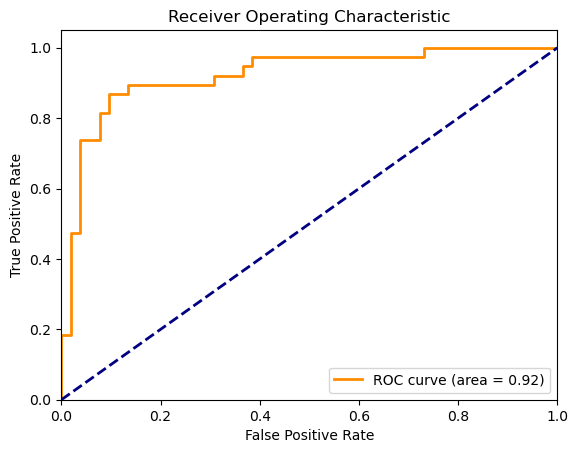

In [41]:
# Plotting the ROC curve on validation set by giving appropriate names for title and axes.

### WRITE CODE HERE

from sklearn.metrics import roc_curve, auc
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

# Predict probabilities
y_probs = best_model.predict_proba(X_val)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_val, y_probs)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
